### Problem 8.1 : Applying QPCA on a Quantum Dataset

**1. Generate a Quantum Dataset:**
Prepare quantum states with some variability (representing data points).
Example: Random rotations or superposition states.

**2. Construct the Density Matrix:**
Combine the quantum states into a density matrix, representing the dataset.

**3. Apply QPCA:**
Compute eigenvalues and eigenvectors of the density matrix.

**4. Interpret Results:**
Identify the most significant principal components.

**5. Visualization:**
Represent the principal components and states on the Bloch sphere.


In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, DensityMatrix
import numpy as np
import matplotlib.pyplot as plt
from qiskit.visualization import plot_bloch_multivector

In [2]:
# Step 1: Generate a Quantum Dataset
def generate_quantum_dataset(n_points):
    """Generate quantum dataset with random rotations."""
    states = []
    for _ in range(n_points):
        theta = np.random.uniform(0, np.pi)  # Random rotation angle
        qc = QuantumCircuit(1)
        qc.ry(theta, 0)  # Apply rotation
        states.append(Statevector.from_instruction(qc))
    return states

In [3]:
# Step 2: Build Density Matrix
def build_density_matrix(states):
    """Construct density matrix from quantum states."""
    N = len(states)
    rho = sum([np.outer(s.data, s.data.conj()) for s in states]) / N
    return rho

In [4]:
# Step 3: Compute Principal Components
def compute_principal_components(rho):
    """Find eigenvalues and eigenvectors of the density matrix."""
    eigvals, eigvecs = np.linalg.eigh(rho)
    return eigvals, eigvecs

In [5]:
# Generate Dataset
n_points = 5  # Number of data points
states = generate_quantum_dataset(n_points)

In [6]:
states

[Statevector([0.83573629+0.j, 0.54913101+0.j],
             dims=(2,)),
 Statevector([0.32970482+0.j, 0.94408407+0.j],
             dims=(2,)),
 Statevector([0.99111107+0.j, 0.13303702+0.j],
             dims=(2,)),
 Statevector([0.89801822+0.j, 0.43995826+0.j],
             dims=(2,)),
 Statevector([0.82689724+0.j, 0.56235306+0.j],
             dims=(2,))]

In [7]:
states[1]

Statevector([0.32970482+0.j, 0.94408407+0.j],
            dims=(2,))


In [8]:
# Build Density Matrix
rho = build_density_matrix(states)

# Compute Eigenvalues and Eigenvectors
eigenvalues, eigenvectors = compute_principal_components(rho)

In [9]:
# Display Results
print("Eigenvalues (Principal Components' Importance):", eigenvalues)
print("Eigenvectors (Principal Components):\n", eigenvectors)

Eigenvalues (Principal Components' Importance): [0.11461492 0.88538508]
Eigenvectors (Principal Components):
 [[ 0.54561337+0.j -0.83803702+0.j]
 [-0.83803702+0.j -0.54561337+0.j]]


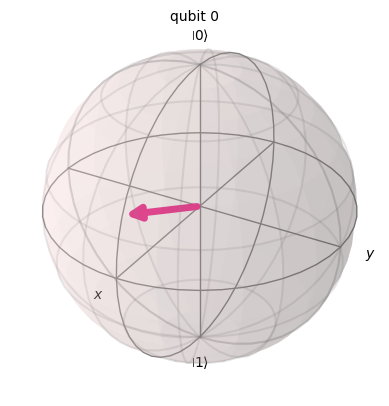

In [10]:
# Step 4: Visualization on Bloch Sphere
# print("\nVisualizing States and Principal Components on Bloch Sphere...")
# for i in range(n_points):
#     print(f"State {i+1}:")
#     plot_bloch_multivector(states[i])

plot_bloch_multivector(states[0])

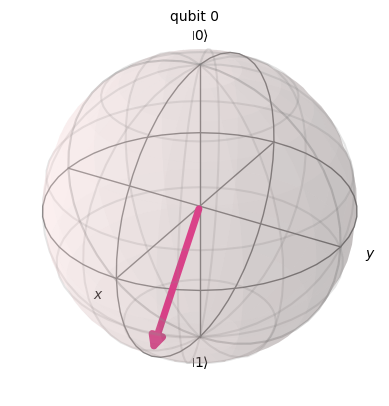

In [11]:
plot_bloch_multivector(states[1])

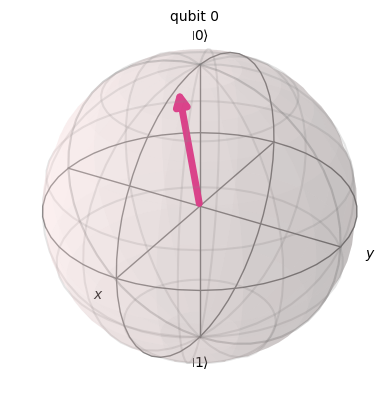

In [12]:
plot_bloch_multivector(states[2])

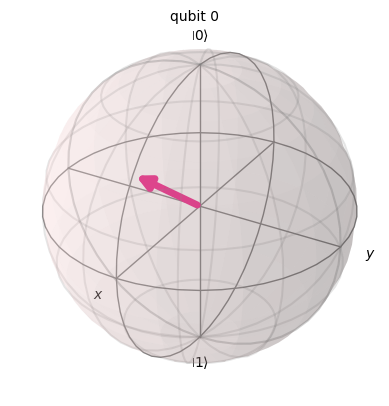

In [13]:
plot_bloch_multivector(states[3])

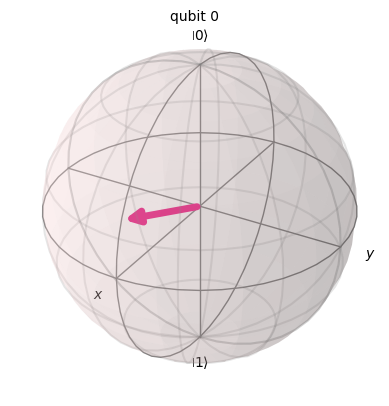

In [14]:
plot_bloch_multivector(states[4])